<a href="https://colab.research.google.com/github/gmm39/CS4410_GMcKenzie/blob/main/Homework4_GMcKenzie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gage McKenzie\
CS4410\
Homework 4

In [60]:
# 15.17
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
# Loading the Dataset
bcdataset = load_breast_cancer();

In [19]:
# Checking the Sample and Target Sizes
print(bcdataset.data.shape)
print(bcdataset.target.shape)

(569, 30)
(569,)


In [23]:
# Splitting the Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(bcdataset.data, bcdataset.target, random_state=11)

In [25]:
# Training and Testing Set Sizes
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [28]:
# Creating the Model (GaussianNB)
gnb = GaussianNB()

In [30]:
# Training the Model
gnb.fit(X_train, y_train)

GaussianNB()

In [31]:
# Predicting
y_pred = gnb.predict(X_test)

In [37]:
# Estimator Method score
print(f'{gnb.score(X_test, y_test):.2%}')

95.10%


In [50]:
# Confusion Matrix
confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confusion)

[[44  6]
 [ 1 92]]


In [43]:
# Classification Report
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        50
           1       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



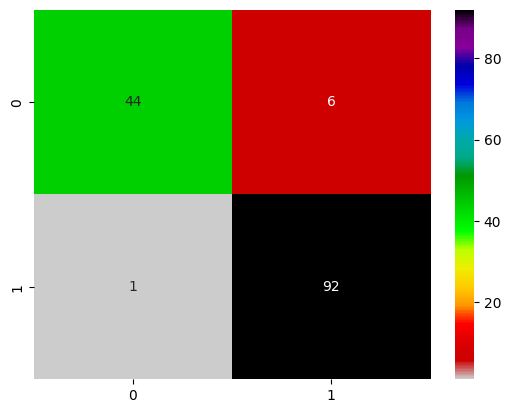

In [51]:
# Visualizing the Confusion Matrix
confusionDF = pd.DataFrame(confusion)
axes = sns.heatmap(confusionDF, annot=True, cmap='nipy_spectral_r')

In [53]:
# K-Fold Cross-Validation
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [59]:
# Using the KFold Object with Function cross_val_score
scores = cross_val_score(estimator=gnb, X=bcdataset.data, y=bcdataset.target, cv=kfold)
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 93.85%


In [65]:
# Running Multiple Models to Find the Best One
estimators = { 'GaussianNB': gnb,
               'KNeighborsClassifier': KNeighborsClassifier(),
               'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
               'SVC': SVC(gamma='scale')}

for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(estimator=estimator_object, X=bcdataset.data,
                           y=bcdataset.target, cv=kfold)
  print(f'{estimator_name:>20}:' + f'mean accuracy={scores.mean():.2%}; ' +
        f'standard deviation={scores.std():.2%}')

          GaussianNB:mean accuracy=93.85%; standard deviation=2.75%
KNeighborsClassifier:mean accuracy=92.79%; standard deviation=2.01%
  LogisticRegression:mean accuracy=95.08%; standard deviation=3.02%
                 SVC:mean accuracy=91.92%; standard deviation=3.52%
